In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##modeling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor


In [4]:
df = pd.read_csv('data/stud.csv')

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
X = df.drop(columns=['math_score'],axis=1)

In [7]:
y = df['math_score']

In [8]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [13]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [14]:
numeric_transform = StandardScaler()
obj_transform = OneHotEncoder()

In [15]:
preprocessor =ColumnTransformer([
    ("onehotencoder",obj_transform,cat_features),
    ("StandardScaler",numeric_transform,num_features)
])

In [16]:
X = preprocessor.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [63]:
X_train

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.05694554,  0.45733301],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.94779033,  0.98406266],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.35894946,  1.18158627],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.49126664, -0.99117351],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -1.45063795, -0.99117351],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.4960025 ,  1.37910989]])

In [54]:
def performanace(y_test,y_pred):
    rscore = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    return rscore,mse

In [62]:
models = {
    "kNNR" : KNeighborsRegressor(),
    "decision_tree": DecisionTreeRegressor(),
    "randon_forest":RandomForestRegressor(),
    "adaboost": AdaBoostRegressor(),
    "svr": SVR(),
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "lasso":Lasso(),
    "catboost":CatBoostRegressor(verbose=False)
}

model_list = []
score_list = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse, train_r2 = performanace(y_train, y_train_pred)
    test_mse, test_r2 = performanace(y_test, y_test_pred)

    print(name)
    model_list.append(name)

    print("model train")
    print("r2_score:", train_r2)
    print("mse:", train_mse)

    print('------------------------')

    print("model test")
    print("r2_score:", test_r2)
    print("mse:", test_mse)

    score_list.append(test_r2)

    print("="*32)
    print('\n')

df = pd.DataFrame({
    "model_name": model_list,
    "r2_score": score_list
}).sort_values(by="r2_score", ascending=False)

df


kNNR
model train
r2_score: 32.57995
mse: 0.8554876322327585
------------------------
model test
r2_score: 52.6066
mse: 0.7838129945787431


decision_tree
model train
r2_score: 0.078125
mse: 0.9996534669718089
------------------------
model test
r2_score: 64.69
mse: 0.7341562203088374


randon_forest
model train
r2_score: 5.21421319168084
mse: 0.9768717172870743
------------------------
model test
r2_score: 36.16633152756519
mse: 0.8513743349690588


adaboost
model train
r2_score: 34.5862308420788
mse: 0.8465885272649835
------------------------
model test
r2_score: 38.13404514273201
mse: 0.843288009032968


svr
model train
r2_score: 43.257024268031365
mse: 0.8081281585902299
------------------------
model test
r2_score: 66.04200493745648
mse: 0.7286001513223705


LinearRegression
model train
r2_score: 28.362716217041015
mse: 0.8741936903882622
------------------------
model test
r2_score: 29.388879013061523
mse: 0.8792262996178921


Ridge
model train
r2_score: 28.33778823308244
mse: 0.

,model_name,r2_score
4,svr,66.042005
1,decision_tree,64.690000
0,kNNR,52.606600
7,lasso,42.506417
3,adaboost,38.134045
2,randon_forest,36.166332
8,catboost,36.103658
5,LinearRegression,29.388879
6,Ridge,29.056272


In [66]:
svr = SVR(kernel='poly')
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)
print(r2_score(y_test,y_pred))

0.8427993947240513


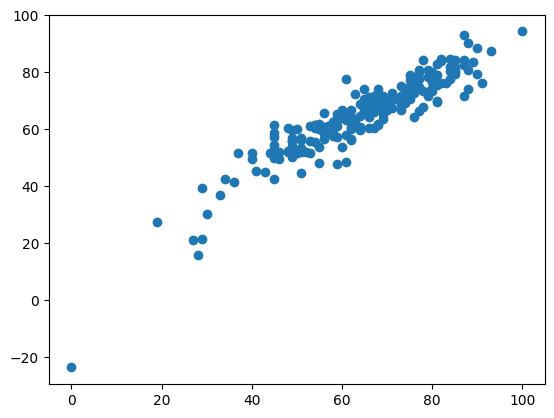

In [67]:
plt.scatter(y_test,y_pred)